In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X = np.array([a for a in range(50)]).reshape(-1, 1) 

y = np.array([np.random.randint(a+1) for a in X]).reshape(-1, 1) 

reg = LinearRegression()

reg.fit(X, y)

LinearRegression()

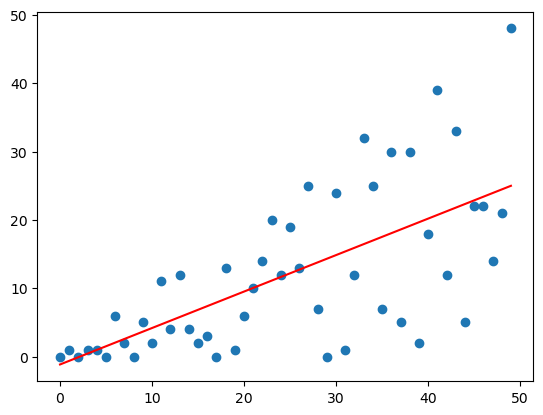

In [3]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), c="red")
plt.show()

# Capturamos los datos que usaremos: México y El Salvador

In [4]:
mex_names = ['MEXICO_2018.csv', 'MEXICO_2019.csv', 'MEXICO_2020.csv', 'MEXICO_2021.csv', 'MEXICO_2022.csv', 'MEXICO_2023.csv']
raw_mex = [pd.read_csv("DATA/" + name, encoding='latin-1') for name in mex_names]
# raw_mex da index 0 → 5, años 2018 → 2023

els_name = "ELSALVADOR_2020-2024.xlsx"
els_yrs = ["2020", "2021", "2022", "2023", "2024"]
raw_els = [pd.read_excel("DATA/" + els_name, sheet_name=year) for year in els_yrs]
# raw_mex da index 0 → 4, años 2020 → 2024

## Retiramos los datos que no se usarán en absoluto: 
### Estudiantes de preparatoria

In [5]:
print(raw_mex[0]["NIVEL EDUCATIVO"].unique())
# Nos interesa revisar solamente estudiantes de nivel superior y prosgrado

['Nivel Medio Superior' 'Nivel Superior' 'Nivel Posgrado']


# Limpiamos los datos: México
## Ajustamos a nivel de tablas

In [6]:
# Esta funcion cambia una cadena por otra en toda una columna
# Se usó para corregir tildes mal decodificadas
# Y para estandarizar nombres
def reemplazar_cadenas(s, reemplazos):
    for viejo, nuevo in reemplazos.items():
        s = s.replace(viejo, nuevo)
    return s

In [7]:
# Tomamos notación iloc porque la col. del último archivo se llama "NIVEL" y no "NIVEL EDUCATIVO"
clean_mex = [tabla.loc[tabla.iloc[:, 0] != "Nivel Medio Superior"] for tabla in raw_mex]

# Nos interesan solo las columnas de nivel, carrera, H y M
clean_mex[:5] = [tabla.iloc[:, [0, 2, 4, 5]] for tabla in clean_mex[:5]]
clean_mex[5] = clean_mex[5].iloc[:, [0, 2, 3, 4]] # Esta es diferente porque 2023 tiene una col. menos

# Estandarizamos los nombres de las columnas
for i in range(len(clean_mex)):
    clean_mex[i].columns = ['NIVEL', 'CARRERA', 'HOMBRES', 'MUJERES']

# Debemos corregir un mal formato de tildes en los datos de 2022
r_tildes = {'\x87': 'á', '\x8e': 'é', '\x92': 'í', '\x97': 'ó', '\x9c': 'ú'}

clean_mex[4]["CARRERA"] = clean_mex[4]["CARRERA"].apply(lambda x: reemplazar_cadenas(x, r_tildes))



## Estandarizamos nombres
### e.g. "Ingeniería Eléctrica" → "Ing. Electrica"

In [8]:
r_nombres = {"Ingeniería": "Ing.", "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u"}
# Quitamos las tildes al ser inconsistentes por naturaleza, e.g. "Mécanica"
clean_mex[4].loc[clean_mex[4]["CARRERA"].str.contains("Mécanica")]

,NIVEL,CARRERA,HOMBRES,MUJERES
402,Nivel Posgrado,Maestría en Ciencias en Mécanica de suelos,0,0


In [9]:
for i in range(len(clean_mex)):
    clean_mex[i]["CARRERA"] = clean_mex[i]["CARRERA"].apply(lambda x: reemplazar_cadenas(x, r_nombres))

In [10]:
clean_mex[0]

,NIVEL,CARRERA,HOMBRES,MUJERES
101,Nivel Superior,Ing. Electrica,270,25
102,Nivel Superior,Ing. en Comunicaciones y Electronica,523,150
103,Nivel Superior,Ing. en Control y Automatizacion,295,42
104,Nivel Superior,Ing. en Sistemas Automotrices,10,0
105,Nivel Superior,Ing. en Comunicaciones y Electronica,155,19
...,...,...,...,...
352,Nivel Posgrado,Especialidad en Gestion Estrategica de la Inno...,11,3
353,Nivel Posgrado,Maestria en Ciencias en Metodologia de la Ciencia,11,7
354,Nivel Posgrado,Maestria en Politica y Gestion del Cambio Tecn...,3,13
355,Nivel Posgrado,Maestria en Economia y Gestion Municipal,12,12


In [11]:
clean_mex[1]

,NIVEL,CARRERA,HOMBRES,MUJERES
102,Nivel Superior,Ing. Electrica,224,17
103,Nivel Superior,Ing. en Comunicaciones y Electronica,518,104
104,Nivel Superior,Ing. en Control y Automatizacion,320,52
105,Nivel Superior,Ing. en Sistemas Automotrices,21,0
106,Nivel Superior,Ing. en Comunicaciones y Electronica,200,45
...,...,...,...,...
359,Nivel Posgrado,Especialidad en Gestion Estrategica de la Inno...,3,4
360,Nivel Posgrado,Maestria en Ciencias en Metodologia de la Ciencia,13,9
361,Nivel Posgrado,Maestria en Docencia Cientifica y Tecnologica,6,19
362,Nivel Posgrado,Maestria en Economia y Gestion Municipal,11,10


In [12]:
clean_mex[2]

,NIVEL,CARRERA,HOMBRES,MUJERES
92,Nivel Superior,Ing. Electrica,223.0,26.0
93,Nivel Superior,Ing. en Comunicaciones y Electronica,485.0,135.0
94,Nivel Superior,Ing. en Control y Automatizacion,14.0,0.0
95,Nivel Superior,Ing. en Sistemas Automotrices,277.0,46.0
96,Nivel Superior,Ing. en Comunicaciones y Electronica,153.0,27.0
...,...,...,...,...
317,Nivel Posgrado,Especialidad en Gestion Estrategica de la Inno...,8.0,6.0
318,Nivel Posgrado,Maestria en Ciencias en Metodologia de la Ciencia,15.0,16.0
319,Nivel Posgrado,Maestria en Docencia Cientifica y Tecnologica,13.0,30.0
320,Nivel Posgrado,Maestria en Economia y Gestion Municipal,19.0,19.0


In [13]:
clean_mex[3]

,NIVEL,CARRERA,HOMBRES,MUJERES
93,Nivel Superior,Ing. en Control y Automatizacion,278,61
94,Nivel Superior,Ing. en Sistemas Automotrices,60,5
95,Nivel Superior,Ing. en Comunicaciones y Electronica,582,132
96,Nivel Superior,Ing. Electrica,229,25
97,Nivel Superior,Ing. en Computacion,145,30
...,...,...,...,...
322,Nivel Posgrado,Especialidad en Gestion Estrategica de la Inno...,1,2
323,Nivel Posgrado,Maestria en Docencia Cientifica y Tecnologica,5,25
324,Nivel Posgrado,Maestria en Politica y Gestion del Cambio Tecn...,8,1
325,Nivel Posgrado,Maestria en Economia y Gestion Municipal,10,2


In [14]:
clean_mex[4]

,NIVEL,CARRERA,HOMBRES,MUJERES
141,Nivel Superior,Ing. Mecanica,392,81
142,Nivel Superior,Ing. en Sistemas Automotrices,118,4
143,Nivel Superior,Ing. en Robotica Industrial,216,32
144,Nivel Superior,Ing. en Computacion,182,43
145,Nivel Superior,Ing. Mecanica,257,44
...,...,...,...,...
507,Nivel Posgrado,Maestria en Biotecnologia Productiva,0,0
508,Nivel Posgrado,Curso propedeutico,0,0
509,Nivel Posgrado,Maestria en Ciencias en Bioprocesos,4,4
510,Nivel Posgrado,Doctorado en Ciencias en Bioprocesos,0,3


In [15]:
clean_mex[5]

,NIVEL,CARRERA,HOMBRES,MUJERES
117,Nivel Superior,Ing. Mecanica,378,70
118,Nivel Superior,Ing. en Robotica Industrial,194,42
119,Nivel Superior,Ing. en Sistemas Automotrices,136,10
120,Nivel Superior,Ing. Mecanica,285,45
121,Nivel Superior,Ing. en Computacion,167,49
...,...,...,...,...
418,Nivel Posgrado,Maestria en Ciencias en Bioprocesos,3,4
419,Nivel Posgrado,Doctorado en Nanociencias y Micro - Nanotecnol...,1,0
420,Nivel Posgrado,Doctorado en Biotecnologia Productiva,0,0
421,Nivel Posgrado,Maestria en Biotecnologia Productiva,0,0


# Limpiamos los datos: El Salvador
## Creamos tablas limpias sin necesidad de mucha depuración

In [16]:
clean_els = [tabla[2:] for tabla in raw_els]
for i in range(len(raw_els)):
    clean_els[i].columns = ["CARRERA", "HOMBRES", "MUJERES", "TOTAL"]
    clean_els[i] = clean_els[i].loc[clean_els[i]["HOMBRES"].notna()] # Quitamos filas donde indican la facultad
    clean_els[i] = clean_els[i].loc[clean_els[i]["CARRERA"].str.contains("Facultad") == False] # Quitamos filas donde indican total x facultad
    clean_els[i]["CARRERA"] = clean_els[i]["CARRERA"].apply(lambda x: reemplazar_cadenas(x, r_nombres)) # Formateamos carreras

In [17]:
clean_els[0]

,CARRERA,HOMBRES,MUJERES,TOTAL
2,Doctorado en Medicina (D10101 - 1992),132,153,285
3,Especialidad Medica en Cirugia General (E10101...,1,0,1
4,Especialidad Medica en Cirugia General (E10101...,17,6,23
5,Especialidad Medica en Ginecologia y Obstetric...,0,1,1
6,Especialidad Medica en Ginecologia y Obstetric...,4,12,16
...,...,...,...,...
188,Maestria en Traduccion Ingles Español - Españo...,0,1,1
189,Maestria en Estudios de Cultura Centroamerican...,2,4,6
190,Profesorado en Educacion Basica para Primero y...,0,1,1
191,Profesorado en Lenguaje y Literatura para Terc...,1,1,2


In [18]:
clean_els[1]

,CARRERA,HOMBRES,MUJERES,TOTAL
2,Doctorado en Medicina (D10101 - 1992),109,123,232
3,Especialidad Medica en Cirugia General (E10101...,1,0,1
4,Especialidad Medica en Ginecologia y Obstetric...,1,15,16
5,Especialidad Medica en Medicina Interna (E1010...,4,0,4
6,Especialidad Medica en Medicina Interna (E1010...,9,12,21
...,...,...,...,...
221,Profesorado en Lenguaje y Literatura para Terc...,3,14,17
222,Profesorado en Idioma Ingles para Tercer Ciclo...,0,1,1
223,Tecnico en Bibliotecologia (T10454 - 2012),2,12,14
224,Maestria en Formacion para la Docencia Univers...,2,6,8


In [19]:
clean_els[2]

,CARRERA,HOMBRES,MUJERES,TOTAL
2,Doctorado en Medicina (D10101 - 1992),106,151,257
3,Especialidad Medica en Cirugia General (E10101...,2,1,3
4,Especialidad Medica en Cirugia General (E10101...,12,6,18
5,Especialidad Medica en Ginecologia y Obstetric...,4,15,19
6,Especialidad Medica en Medicina Interna (E1010...,2,0,2
...,...,...,...,...
239,Profesorado en Educacion Parvularia (P10401 - ...,0,1,1
240,Profesorado en Lenguaje y Literatura para Terc...,2,10,12
241,Profesorado en Idioma Ingles para Tercer Ciclo...,2,0,2
242,Tecnico en Bibliotecologia (T10454 - 2012),4,16,20


In [20]:
clean_els[3]

,CARRERA,HOMBRES,MUJERES,TOTAL
2,Doctorado en Medicina (D10101 - 1992),115,133,248
3,Especialidad Medica en Cirugia General (E10101...,1,0,1
4,Especialidad Medica en Cirugia General (E10101...,7,5,12
5,Especialidad Medica en Ginecologia y Obstetric...,2,14,16
6,Especialidad Medica en Medicina Interna (E1010...,0,2,2
...,...,...,...,...
245,Maestria en Estudios de Cultura Centroamerican...,0,1,1
246,Profesorado en Lenguaje y Literatura para Terc...,2,11,13
247,Tecnico en Bibliotecologia (T10454 - 2012),3,6,9
248,Maestria en Formacion para la Docencia Univers...,2,2,4


In [21]:
clean_els[4]

,CARRERA,HOMBRES,MUJERES,TOTAL
2,Doctorado en Medicina (D10101 - 1992),104,152,256
3,Especialidad Medica en Cirugia General (E10101...,2,0,2
4,Especialidad Medica en Ginecologia y Obstetric...,0,1,1
5,Especialidad Medica en Ginecologia y Obstetric...,2,16,18
6,Especialidad Medica en Medicina Interna (E1010...,4,4,8
...,...,...,...,...
209,Profesorado en Educacion Fisica y Deportes (P1...,1,0,1
210,Profesorado en Lenguaje y Literatura para Terc...,0,2,2
211,Licenciatura en Sociologia (L10406 - 1995),1,0,1
212,Maestria en Formacion para la Docencia Univers...,2,2,4


In [123]:
areas_estudio = ["Ing. Electrica",
                 "Ing. Mecanica",
                 "Ing. Industrial"]
# Luego añadimos manualmente Ing. en Informatica/Ing. de Sistemas Informaticos

country_year = {}
country_year["MEX2018"] = clean_mex[0]
country_year["MEX2019"] = clean_mex[1]
country_year["MEX2020"] = clean_mex[2]
country_year["MEX2021"] = clean_mex[3]
country_year["MEX2022"] = clean_mex[4]
country_year["MEX2023"] = clean_mex[5]

country_year["ELS2020"] = clean_els[0]
country_year["ELS2021"] = clean_els[1]
country_year["ELS2022"] = clean_els[2]
country_year["ELS2023"] = clean_els[3]
country_year["ELS2024"] = clean_els[4]

encontrados = [0]*len(areas_estudio)

for index, area in enumerate(areas_estudio):
    for key, cwd in country_year.items():
        if len(cwd.loc[cwd["CARRERA"].str.contains(area)]) > 0:
            encontrados[index] += 1
        else:
            print(areas_estudio[index], "no está en", key)
    
encontrados

[11, 11, 11]

In [137]:
comp_paises = pd.DataFrame()
comp_paises.index = ["Ing. Electrica",
                     "Ing. Mecanica",
                     "Ing. Industrial",
                     "Ing. Informatica"]

cp_columns = ["MEX2020", "MEX2021", "MEX2022", "MEX2023",
              "ELS2020", "ELS2021", "ELS2022", "ELS2023"]

In [138]:
for column in cp_columns:
    total = []
    cwd = country_year[column]
    for area in areas_estudio:
        h_v = sum(cwd.loc[cwd["CARRERA"].str.contains(area)]["HOMBRES"])
        m_v = sum(cwd.loc[cwd["CARRERA"].str.contains(area)]["MUJERES"])
        total.append(int(h_v + m_v))
    
    if "MEX" in column:
        h_v = sum(cwd.loc[cwd["CARRERA"].str.contains("Ing. en Informatica")]["HOMBRES"])
        m_v = sum(cwd.loc[cwd["CARRERA"].str.contains("Ing. en Informatica")]["MUJERES"])
        total.append(int(h_v + m_v))
    if "ELS" in column:
        h_v = sum(cwd.loc[cwd["CARRERA"].str.contains("Ing. de Sistemas Informaticos")]["HOMBRES"])
        m_v = sum(cwd.loc[cwd["CARRERA"].str.contains("Ing. de Sistemas Informaticos")]["MUJERES"])
        total.append(int(h_v + m_v))

    comp_paises[column] = total

In [139]:
comp_paises

,MEX2020,MEX2021,MEX2022,MEX2023,ELS2020,ELS2021,ELS2022,ELS2023
Ing. Electrica,278,267,297,327,21,32,79,54
Ing. Mecanica,715,770,870,897,9,14,36,31
Ing. Industrial,437,542,527,654,53,145,167,101
Ing. Informatica,152,214,208,256,100,217,137,161


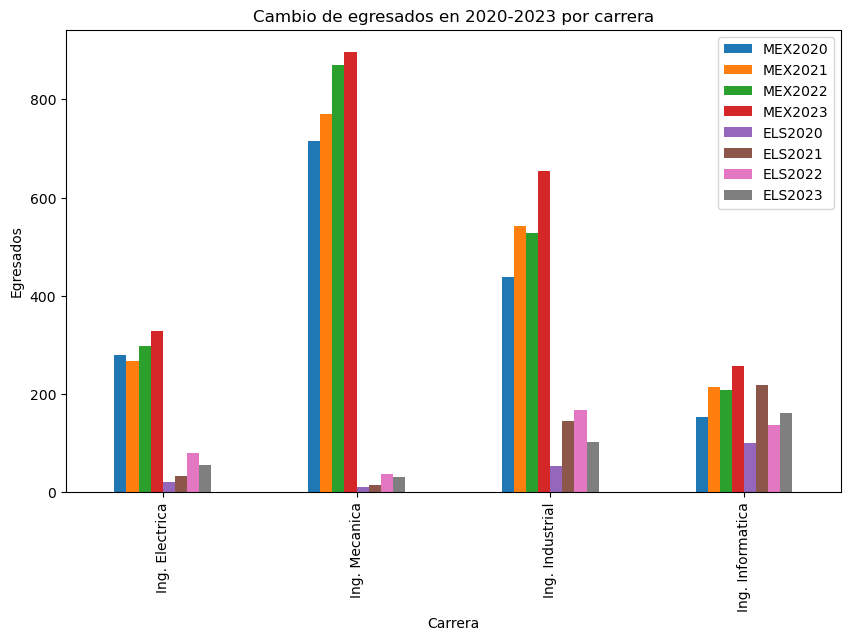

In [140]:
# Plotting
ax = comp_paises.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
ax.set_title('Cambio de egresados en 2020-2023 por carrera')
ax.set_xlabel("Carrera")
ax.set_ylabel("Egresados")

# Show the plot
plt.show()